In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import math

## Take a function whose DFT we want to find

$$f(t) = Asin(\omega t - \phi);   \omega = 2\pi f$$
Take a test function $ f(t) = 5sin(2\pi6t + 2)$
$$ f(x) = 5sin(2\pi1t) + sin(2\pi6t) + 0.5*sin(2\pi12t)$$

$$f(t) = 15\sin(2\pi\frac{3}{N}t + \pi\phi) + 3\cos(2\pi\frac{6}{N}t + \pi\phi)$$

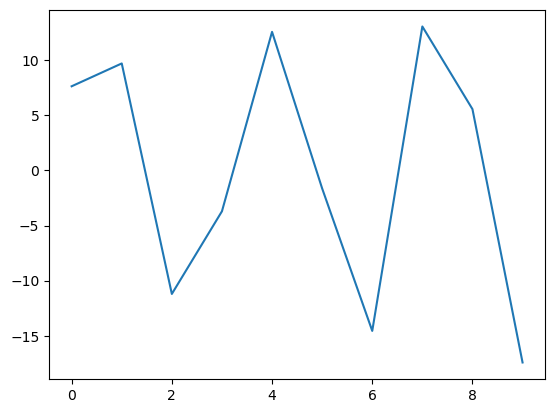

In [2]:
t = np.arange(10);
f = np.arange(10);
N = len(f)                       # Total number of samples/data points.
f_t = np.round(15*np.sin(2*np.pi*(3/N)*t + ((1/10)*np.pi)) + 3*np.cos(2*np.pi*(6/N)*t + ((2/1)*np.pi)), 3)
func_t = Matrix(f_t)
plt.plot(t,f_t)

In [3]:
t_matrix = Matrix(t)
f_matrix = Matrix(f)
f_transpose = f_matrix.T
mat_mult = t_matrix*f_transpose
mat_mult  # This is what we get after multiplying two arrays t and f with one of them being transposed. 

Matrix([
[0, 0,  0,  0,  0,  0,  0,  0,  0,  0],
[0, 1,  2,  3,  4,  5,  6,  7,  8,  9],
[0, 2,  4,  6,  8, 10, 12, 14, 16, 18],
[0, 3,  6,  9, 12, 15, 18, 21, 24, 27],
[0, 4,  8, 12, 16, 20, 24, 28, 32, 36],
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45],
[0, 6, 12, 18, 24, 30, 36, 42, 48, 54],
[0, 7, 14, 21, 28, 35, 42, 49, 56, 63],
[0, 8, 16, 24, 32, 40, 48, 56, 64, 72],
[0, 9, 18, 27, 36, 45, 54, 63, 72, 81]])

In [4]:
f_times_t = f*t.reshape(len(t),1)  # Array multiplication of f and transpose of t.

In [5]:
exp_func = np.round(np.exp(-1j*2*np.pi*(1/N)*f_times_t), 3)

In [6]:
DFT_kernel = Matrix(exp_func)
DFT_kernel

Matrix([
[1.0,              1.0,              1.0,              1.0,              1.0,  1.0,              1.0,              1.0,              1.0,              1.0],
[1.0,  0.809 - 0.588*I,  0.309 - 0.951*I, -0.309 - 0.951*I, -0.809 - 0.588*I, -1.0, -0.809 + 0.588*I, -0.309 + 0.951*I,  0.309 + 0.951*I,  0.809 + 0.588*I],
[1.0,  0.309 - 0.951*I, -0.809 - 0.588*I, -0.809 + 0.588*I,  0.309 + 0.951*I,  1.0,  0.309 - 0.951*I, -0.809 - 0.588*I, -0.809 + 0.588*I,  0.309 + 0.951*I],
[1.0, -0.309 - 0.951*I, -0.809 + 0.588*I,  0.809 + 0.588*I,  0.309 - 0.951*I, -1.0,  0.309 + 0.951*I,  0.809 - 0.588*I, -0.809 - 0.588*I, -0.309 + 0.951*I],
[1.0, -0.809 - 0.588*I,  0.309 + 0.951*I,  0.309 - 0.951*I, -0.809 + 0.588*I,  1.0, -0.809 - 0.588*I,  0.309 + 0.951*I,  0.309 - 0.951*I, -0.809 + 0.588*I],
[1.0,             -1.0,              1.0,             -1.0,              1.0, -1.0,              1.0,             -1.0,              1.0,             -1.0],
[1.0, -0.809 + 0.588*I,  0.309 - 0.951*I,  0.309 

In [7]:
DFT_of_ft = DFT_kernel*func_t

In [8]:
DFT_of_ft

Matrix([
[                                           0],
[-0.000569999999999737 - 0.0142199999999981*I],
[0.000456000000001566 + 3.5527136788005e-15*I],
[                       23.17557 - 71.33229*I],
[                                   14.999544],
[                         3.5527136788005e-15],
[                                   14.999544],
[                       23.17557 + 71.33229*I],
[0.000456000000001566 - 3.5527136788005e-15*I],
[-0.000569999999999737 + 0.0142199999999981*I]])

In [9]:
dft_func = np.dot(exp_func, f_t)
amp = abs(dft_func)/(N/2)
amp

array([0.00000000e+00, 2.84628389e-03, 9.12000000e-05, 1.50005368e+01,
       2.99990880e+00, 0.00000000e+00, 2.99990880e+00, 1.50005368e+01,
       9.12000000e-05, 2.84628389e-03])

In [10]:
dft_func

array([ 0.0000000e+00+0.00000000e+00j, -5.7000000e-04-1.42200000e-02j,
        4.5600000e-04+0.00000000e+00j,  2.3175570e+01-7.13322900e+01j,
        1.4999544e+01-2.66453526e-15j,  0.0000000e+00+0.00000000e+00j,
        1.4999544e+01+2.66453526e-15j,  2.3175570e+01+7.13322900e+01j,
        4.5600000e-04+0.00000000e+00j, -5.7000000e-04+1.42200000e-02j])

In [11]:
test_phase = dft_func[3]
test_phase

(23.17557-71.33229j)

In [12]:
radian_value = np.arctan2(-71.32, 23.175)

In [13]:
radian_value

-1.2566151557369567

In [14]:
math.degrees(radian_value)

-71.99874489590228

<StemContainer object of 3 artists>

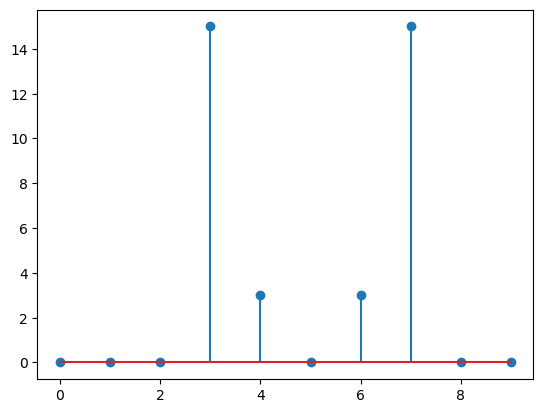

In [15]:
plt.stem(t, amp)

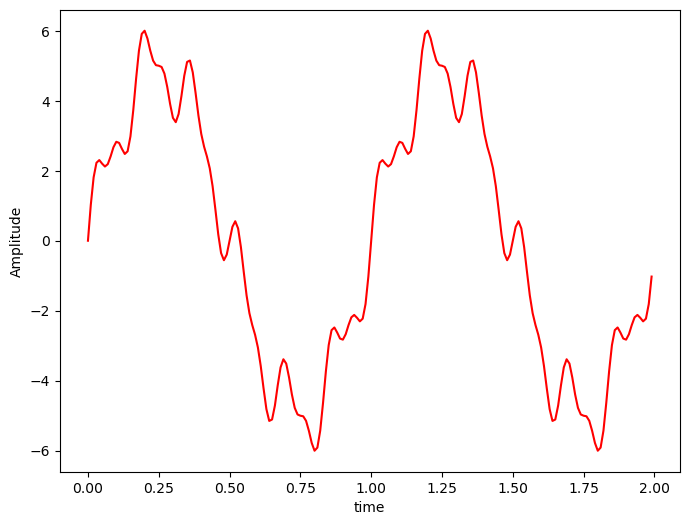

In [2]:
# sampling rate
sr = 100
# sampling interval
ts = 1/sr

t = np.arange(0, 2, ts)

freq = 1
x = 5*np.sin(2*np.pi*freq*t)

freq = 6 
x += np.sin(2*np.pi*freq*t)

freq = 12

x += 0.5*np.sin(2*np.pi*freq*t)


plt.figure(figsize = (8,6))
plt.plot(t,x, 'r')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.show()


## Discrete Fourier Transform


Length of N is:  200 



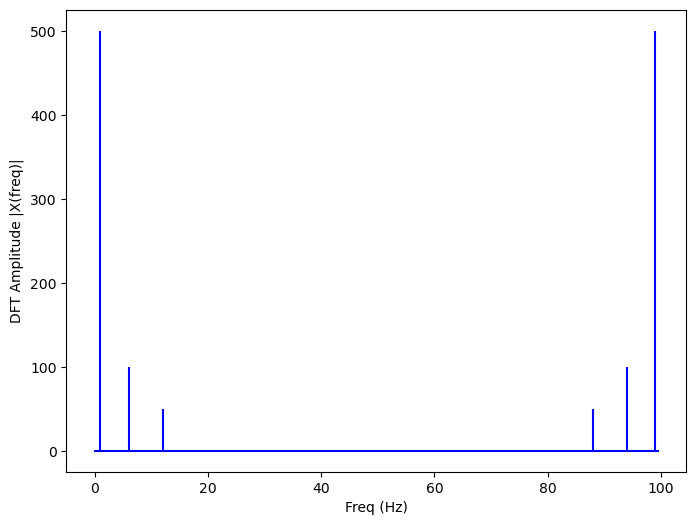

In [4]:
def DFT(x):

    """Funtion to calculate the discrete Fourier Transform of a 1D real-valued signal x    """
    
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j*np.pi*k*n/N)
    X = np.dot(e, x)
    return X

X = DFT(x)
# calculate the frequency

N = len(X)
print('\nLength of N is: ',N, '\n')
n = np.arange(N)
T = N/sr
freq = n/T
plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', markerfmt = ' ', basefmt = '-b')
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()
    

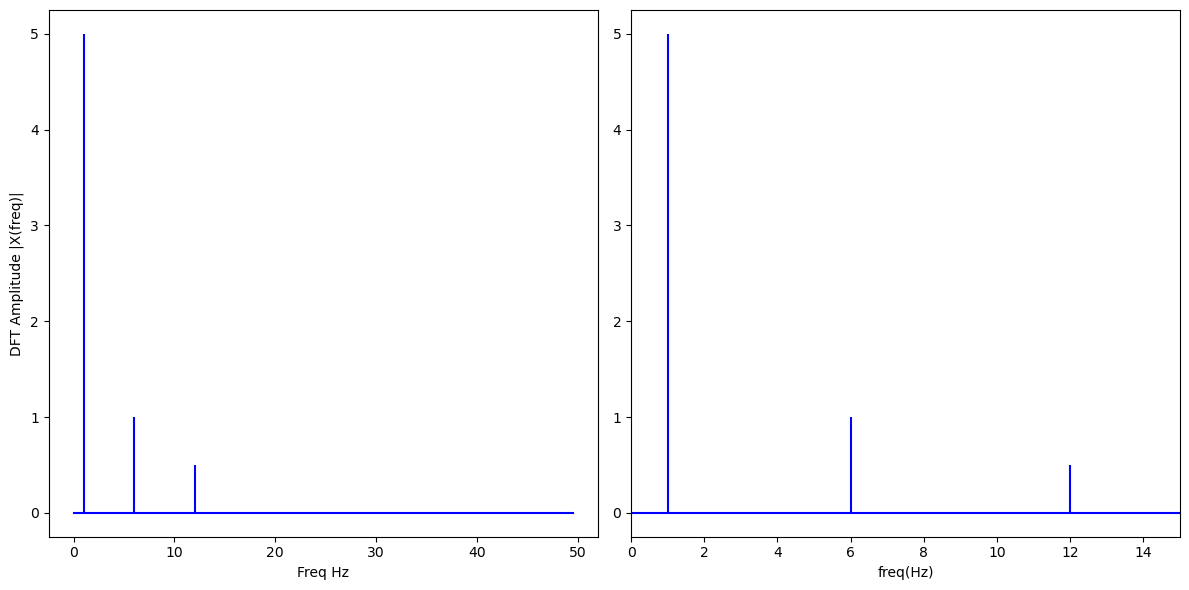

In [5]:
n_oneside = N//2

# get the one side frequency 

f_oneside = freq[:n_oneside]
X_oneside = X[:n_oneside]/n_oneside
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt = ' ', basefmt = '-b')
plt.xlabel('Freq Hz')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt = ' ', basefmt = '-b')
plt.xlabel('freq(Hz)')
plt.xlim(0, 15)
plt.tight_layout()
plt.show()

In [6]:
k = np.arange(200)
n = k.reshape(len(k), 1)
g = 3*np.sin(2*np.pi*(1/200)*k) + np.sin(2*np.pi*(4/200)*k) + 0.5*np.sin(2*np.pi*(7/200)*k)

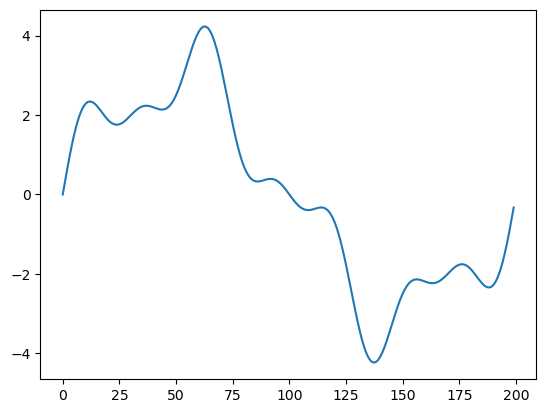

In [7]:
plt.plot(k,g)

In [8]:
exp_func = np.exp(-1j*(np.pi/100)*n*k)

In [9]:
amp = np.dot(exp_func, g)
freq = np.arange(0,2,0.01)

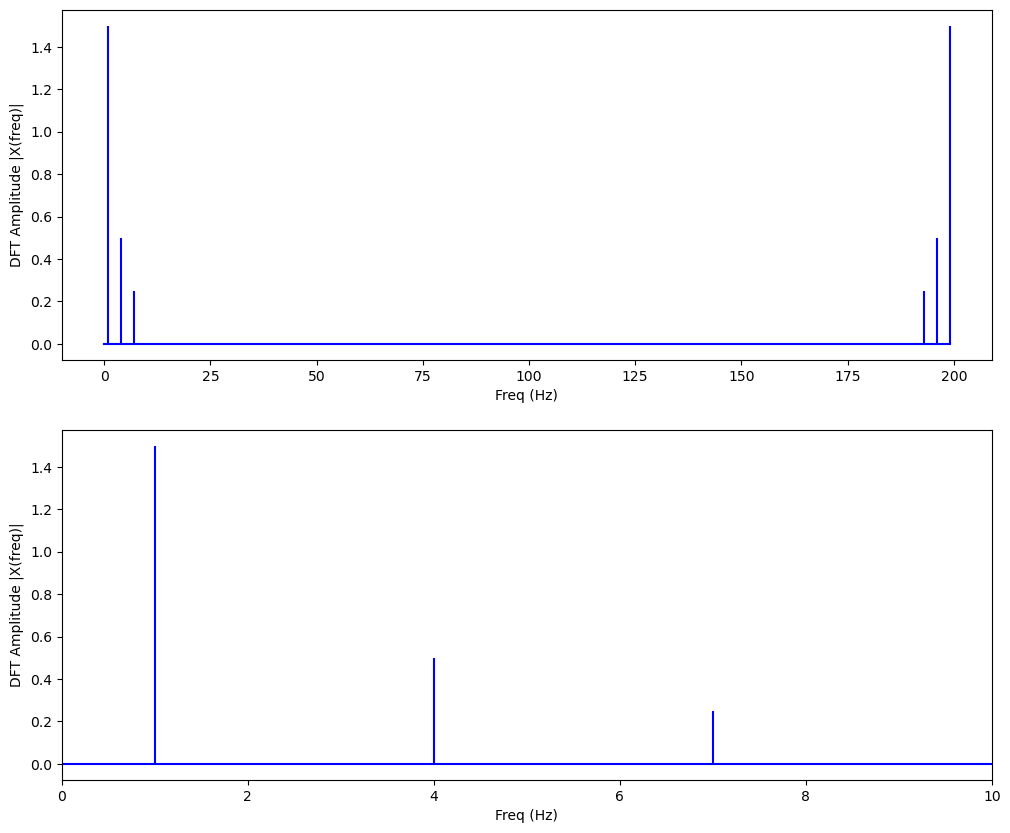

In [11]:
plt.figure(figsize = (12, 10))
plt.subplot(211)
plt.stem(k, abs(amp)/len(k), 'b', markerfmt = ' ', basefmt = '-b')
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(212)
plt.stem(k, abs(amp)/len(k), 'b', markerfmt = ' ', basefmt = '-b')
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.xlim(0,10)
plt.show()
    

### Works but need explanation. What happend if we take total time interval of 3 secs